In [53]:
import numpy as np
from interpolation.splines import UCGrid, CGrid, nodes
from interpolation.splines import eval_linear


In [54]:
from numba import njit

@njit
def interpFast(x_list, y_list, intercept_limit, slope_limit, x0):

    # Make a decay extrapolation
    slope_at_top = (y_list[-1] - y_list[-2]) / (x_list[-1] - x_list[-2])
    level_diff = intercept_limit + slope_limit * x_list[-1] - y_list[-1]
    slope_diff = slope_limit - slope_at_top

    decay_extrap_A = level_diff
    decay_extrap_B = -slope_diff / level_diff

    i = np.maximum(np.searchsorted(x_list[:-1], x0), 1)
    alpha = (x0 - x_list[i - 1]) / (x_list[i] - x_list[i - 1])

    y0 = (1.0 - alpha) * y_list[i - 1] + alpha * y_list[i]

    below_lower_bound = x0 < x_list[0]

    y0[below_lower_bound] = np.nan

    above_upper_bound = x0 > x_list[-1]
    x_temp = x0[above_upper_bound] - x_list[-1]

    y0[above_upper_bound] = (
        intercept_limit
        + slope_limit * x0[above_upper_bound]
        - decay_extrap_A * np.exp(-decay_extrap_B * x_temp)
    )

    return y0

In [55]:
x_list = np.array([0.0,1.0])
y_list = np.array([0.0,1.0])
intercept = 0
slope = -5

In [56]:
x0 = np.linspace(0,10)

In [57]:
y0 = interpFast(x_list, y_list, intercept, slope, x0)

In [58]:
import matplotlib.pyplot as plt

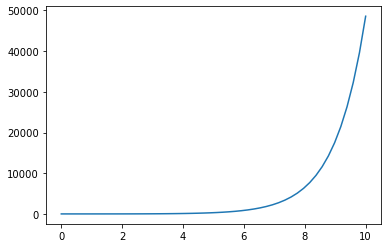

In [59]:
plt.plot(x0,y0)

In [60]:
from HARK.interpolation import LinearInterp

interpolator = LinearInterp(x_list,y_list, intercept,slope)

In [61]:
y1 = interpolator(x0)

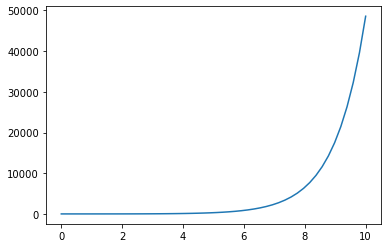

In [62]:
plt.plot(x0,y1)